<a href="https://colab.research.google.com/github/look4pritam/ArtificialIntelligence/blob/master/MachineLearning/K-MeansClustering/Notebooks/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Algorithm 
In this example, we will learn to cluster or group 2D data using [K means clustering algorithm](https://en.wikipedia.org/wiki/K-means_clustering).

# Set the root directory for processing.

In [1]:
import os

root_dir = '/content/'
os.chdir(root_dir)

!ls -al   

total 16
drwxr-xr-x 1 root root 4096 Feb 10 14:33 .
drwxr-xr-x 1 root root 4096 Feb 14 04:49 ..
drwxr-xr-x 4 root root 4096 Feb 10 14:33 .config
drwxr-xr-x 1 root root 4096 Feb 10 14:33 sample_data


# Import required python modules.

In [2]:
import numpy as np
np.random.seed(7)

In [3]:
from sklearn import datasets

In [4]:
from matplotlib import pyplot
%matplotlib inline

# Define helper functions for processing datasets.

In [5]:
def random_dataset_one(number_of_samples=1500):  
  
  number_of_features = 2
  centers = [(-5, -5), (0, 0), (5, 5)]
  random_state = 7
  
  X, y = datasets.make_blobs(n_samples=number_of_samples, n_features=number_of_features, centers=centers, random_state=random_state)  
    
  return(X, y, number_of_samples)

In [6]:
def random_dataset_two(number_of_samples=2500):  
  
  number_of_features=2
  centers = [(-5, -5), (5, -5), (0, 0), (-5, 5), (5, 5)]
  random_state = 7
  
  X, y = datasets.make_blobs(n_samples=number_of_samples, n_features=number_of_features, centers=centers, random_state=random_state)  
    
  return(X, y, number_of_samples)

In [7]:
def show_dataset(points_dataset, cluster_centers=None):  
  pyplot.scatter(points_dataset[:, 0], points_dataset[:, 1], c='black', s=7)
  if(cluster_centers is not None):
    pyplot.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='g')

In [8]:
def show_clustered_dataset(points_dataset, cluster_ids, cluster_centers, number_of_clusters):
  colors = ['r', 'g', 'b', 'y', 'c', 'm']
  figure, axes = pyplot.subplots()
  for i in range(number_of_clusters):
        points = np.array([points_dataset[j] for j in range(len(points_dataset)) if cluster_ids[j] == i])
        axes.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        
  axes.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='#050505')  

# Create a random dataset for processing.

Number of samples are = 1500


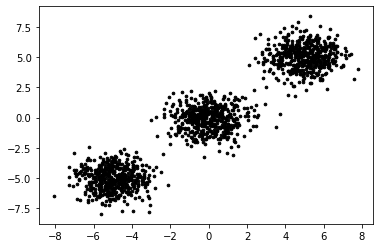

In [9]:
points_dataset, true_y, number_of_samples = random_dataset_one()
print ("Number of samples are = " + str(number_of_samples))

show_dataset(points_dataset)

# Define a distance function.
- Compute a distance between vector one and two.
- Use "Frobenius norm" for distance calculation.
- See [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) for details.

In [10]:
def distance_function(vector_one, vector_two, axis=1):
  return( np.linalg.norm((vector_one - vector_two), axis=axis) )    

# Initialize parameters.

In [11]:
number_of_clusters = 3

x_center = np.random.randint(0, np.max(points_dataset), size=number_of_clusters)
y_center = np.random.randint(0, np.max(points_dataset), size=number_of_clusters)
current_cluster_centers = np.array(list(zip(x_center, y_center)), dtype=np.float32)

# Visualize the dataset with centers.

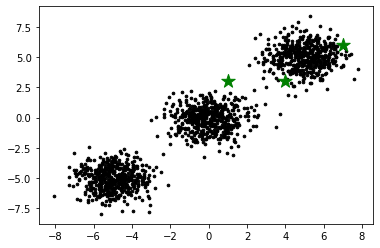

In [12]:
show_dataset(points_dataset, current_cluster_centers)

# Initialize parameters.

In [13]:
previous_cluster_centers = np.zeros(current_cluster_centers.shape)
current_cluster_ids = np.zeros(len(points_dataset))
error = distance_function(current_cluster_centers, previous_cluster_centers, None)

# Assign the cluster centers.
- For a given input sample, compute it's distances from each cluster centers. Use previously defined distance_function(...).
- Compute minimum cluster center distance. Use [numpy.argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) function.
- Assign the cluster corresponding to this minimum distance as the current cluster for the given input sample.

In [14]:
def assign_cluster_center():
    for i in range(len(points_dataset)):
        distances = distance_function(points_dataset[i], current_cluster_centers)
        cluster_id = np.argmin(distances)
        current_cluster_ids[i] = cluster_id

# Compute the cluster centers.
- Collect all input samples for a given cluster.
- Compute average value of all input samples as a new cluster center for the given cluster. Use [numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) function.

In [15]:
def compute_cluster_center():
    for i in range(number_of_clusters):
        points = [points_dataset[j] for j in range(len(points_dataset)) if current_cluster_ids[j] == i]
        current_cluster_centers[i] = np.mean(points, axis=0)

# K means clustering algorithm

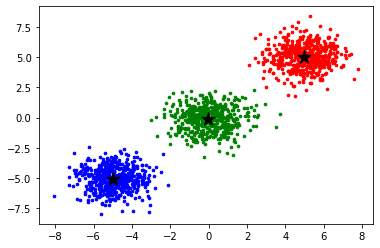

In [23]:
from copy import deepcopy

assign_cluster_center()
    
previous_cluster_centers = deepcopy(current_cluster_centers)
    
compute_cluster_center()
    
error = distance_function(current_cluster_centers, previous_cluster_centers, None)
    
show_clustered_dataset(points_dataset, current_cluster_ids, current_cluster_centers, number_of_clusters)